In [1]:
using Plots,Random

In [17]:
# 1D example
Random.seed!(2022);
prbs = rand(4)
prbs /= sum(prbs)
println(prbs)
print(size(prbs)[1])

[0.047480609696438775, 0.40224879672133207, 0.23127020434512163, 0.31900038923710755]
4

In [18]:
function getp(u, x, prbs)
    if x == 1
        return u*prbs[1]
    else
        return sum(prbs[1:(x-1)]) + u*prbs[x]
    end
end

function getux(p, prbs)
    cusum = 0
    for n = 1:size(prbs)[1]
        if p <= cusum + prbs[n]
            u = (p-cusum)/prbs[n]
            x = n
            return u, x
        end
        cusum += prbs[n]
    end
    error("Something went wrong...")
end

getux (generic function with 1 method)

In [19]:
# forward simulate
Random.seed!(2022);
u = rand()
x = 1
xi = π/16
n_iters = 1000

println("Initial: (u,x) = $((u,x))")

trace = Array{Tuple{Float64, Int64}}(undef, 0)

for n = 1:n_iters
    p = (getp(u, x, prbs)+xi)%1
    #p = p + xi
    #if p > 1
    #    p -= 1
    #end
    u, x = getux(p, prbs)
    push!(trace, (u, x))
end

#backwards

for n = 1:n_iters
    p = getp(u, x, prbs)
    p = p - xi
    if p < 0
        p += 1
    end
    u, x = getux(p, prbs)
end

println("Final: (u,x) = $((u,x))")

Initial: (u,x) = (0.10688645379435302, 1)
Final: (u,x) = (0.10688645379435248, 1)


In [20]:
# marginal x probabilities

eprbs = Vector{Float64}(undef, size(prbs)[1])
for i = 1:size(prbs)[1]
    eprbs[i] = sum([a[2] == i for a in trace])/length(trace)
end
println(prbs)
println(eprbs)


[0.047480609696438775, 0.40224879672133207, 0.23127020434512163, 0.31900038923710755]
[0.047, 0.404, 0.23, 0.319]


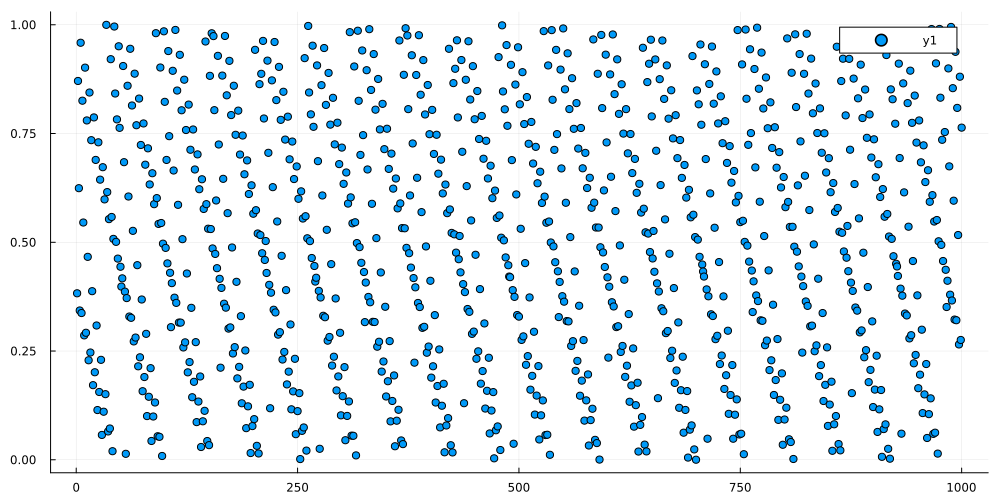

In [21]:
scatter(1:n_iters,[a[1] for a in trace], size = (1000, 500))

In [22]:
function get_eprbs(tr,prbs)
    freqs=zeros(size(prbs,1))
    for n in 1:size(prbs,1)
        freqs[n]=sum(a[2]==n for a in tr)/length(tr)
    end
    return freqs
end

get_eprbs (generic function with 1 method)

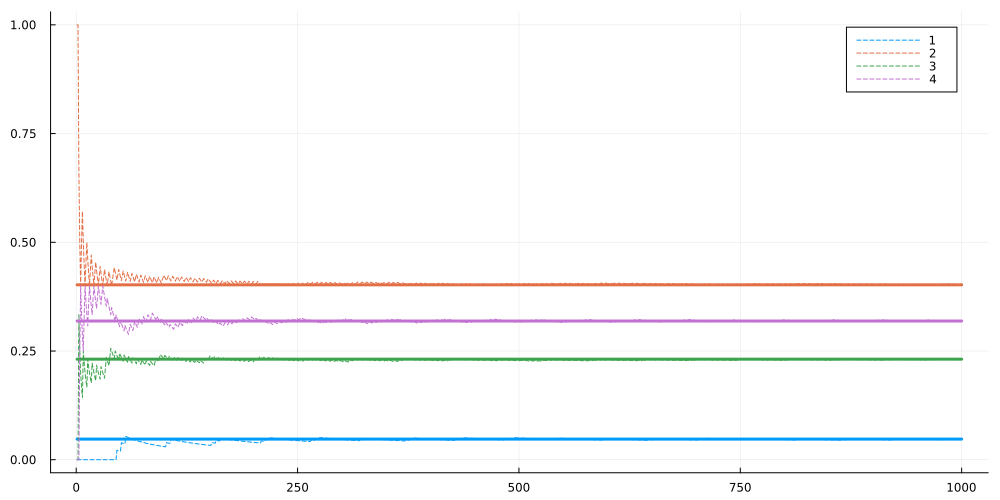

In [23]:
freqs=zeros(size(prbs,1),n_iters)
for it in 1:n_iters
    freqs[:,it]=get_eprbs(trace[1:it],prbs)
end

p=plot(size = (1000, 500))
for n in 1:size(prbs,1)
    plot!(1:n_iters,freqs[n,:], label=n, lw=1, linestyle=:dash,color=n)
    plot!(1:n_iters,prbs[n]*ones(n_iters), label="", lw=3, color=n)
end
p

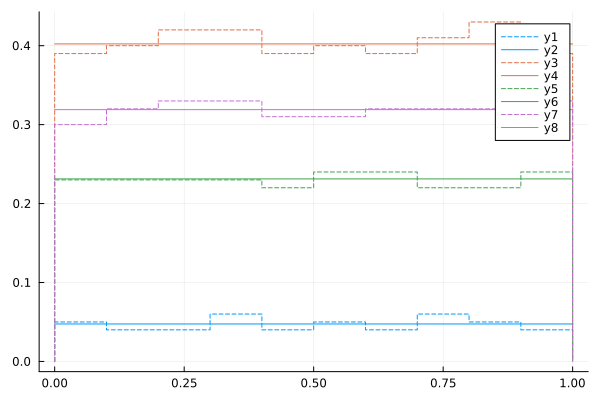

In [24]:
# conditional density of u x (exact and empirical)
p = plot()
for i = 1:size(prbs)[1]
    plot!(p, [a[1] for a in trace if a[2] == i], bins=10, weights = eprbs[i]*10*ones(sum([a[2] == i for a in trace]))/sum([a[2] == i for a in trace]), seriestype=:stephist, color=i, linestyle=:dash)
    plot!(p, Array(0:.001:1), prbs[i]*ones(length(Array(0:.001:1))), color=i)
end
current()

In [25]:
# 2D example
# x dimension is 1, y dimension is 2
prbs = rand(4,4)
prbs /= sum(prbs)

4×4 Matrix{Float64}:
 0.0903257  0.031233   0.0648814   0.0201844
 0.022866   0.0872383  0.00311221  0.0900461
 0.0612982  0.0145122  0.03126     0.120812
 0.13305    0.0718069  0.0893575   0.0680155

In [59]:
# forward simulate
u = rand()
u=0.2654657001673143
x = 1
v = rand()
v=0.40302657652555507
y = 3
xi = π/16
n_iter=100

println("Initial: (u,x) = $((u,x))  (v,y) = $((v,y))")

trace = Array{Tuple{Float64, Int64, Float64, Int64}}(undef, 0)

for n = 1:n_iter
    # take a step in x
    cprbs = prbs[:, y] / sum(prbs[:,y])
    p = getp(u, x, cprbs)
    p = p + xi
    if p > 1
        p -= 1
    end
    u, x = getux(p, cprbs)
    
    # take a step in y
    cprbs = prbs[x, :] / sum(prbs[x, :])

    p = getp(v, y, cprbs)
    p = p + xi
    if p > 1
        p -= 1
    end
    v, y = getux(p, cprbs)
    
    push!(trace, (u, x, v, y))
end
println("Final: (u,x) = $((u,x))  (v,y) = $((v,y))")

#backwards

for n = 1:n_iter
    # take a step in y
    cprbs = prbs[x, :] / sum(prbs[x, :])

    p = getp(v, y, cprbs)
    p = p - xi
    if p < 0
        p += 1
    end
    v, y = getux(p, cprbs)
    
    # take a step in x
    cprbs = prbs[:, y] / sum(prbs[:,y])
    p = getp(u, x, cprbs)
    p = p - xi
    if p < 0
        p += 1
    end
    u, x = getux(p, cprbs)
end

#println("Final: (u,x) = $((u,x))  (v,y) = $((v,y))")


Initial: (u,x) = (0.2654657001673143, 1)  (v,y) = (0.40302657652555507, 3)
Final: (u,x) = (0.5794154137068371, 1)  (v,y) = (0.8415530182849842, 1)


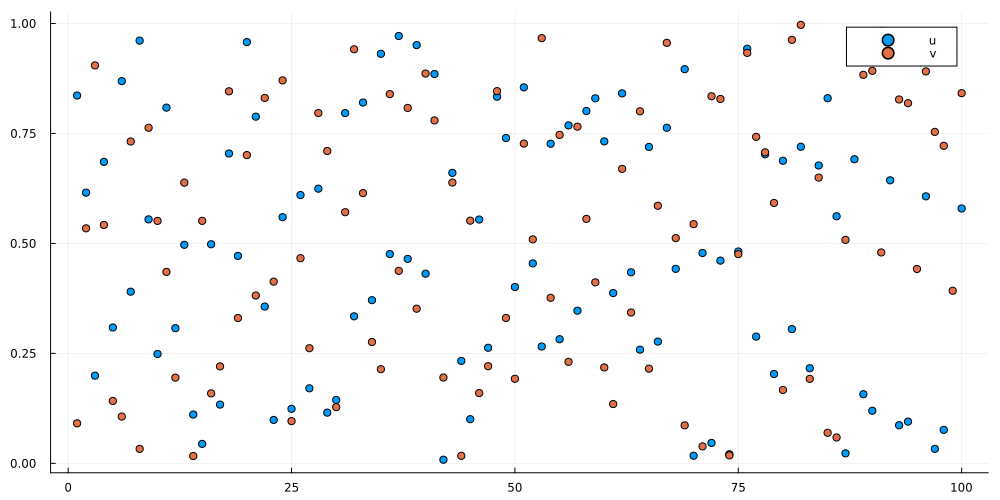

In [60]:
scatter(1:n_iter,[a[1] for a in trace], size = (1000, 500), label="u")
scatter!(1:n_iter,[a[3] for a in trace], size = (1000, 500), label="v")

In [13]:
xs = [a[2] for a in trace]
ys = [a[4] for a in trace]

eprbs = zeros(4,4)
for i = 1:size(prbs)[1]
    for j = 1:size(prbs)[2]
        p = histogram2d(us[(xs .== i) .& (ys .== j)], vs[(xs .== i) .& (ys .== j)])
        eprbs[i,j] = sum([1 for a in trace if (a[2]==i && a[4]==j)])/length(trace)
    end
end

display(prbs)
display(eprbs)

LoadError: UndefVarError: us not defined